In [12]:
import sys
import os

# Get the absolute path of the root directory (one level up from "notebooks")
root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add it to sys.path
sys.path.append(root_dir)

In [13]:
from src.models.build_models import build_kmeans

In [105]:
import numpy as np
import pandas as pd

%pylab inline
import plotly.graph_objects as go

from sklearn.cluster import KMeans

from PIL import Image
from src.data.data_transformations import img_to_tabular
from src.models.build_models import build_kmeans


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [106]:
img = Image.open("../data/raw/img.jpg")

img, img_np, img_flat, img_tab = img_to_tabular(img)

img_tab_sample = img_tab.sample(n=1000, random_state=42).sort_index()
img_flat_sample = img_tab_sample.values

In [107]:
elapsed, inertia, cluster_centers, iters, compressed_img, compressed_img_pil, labels= build_kmeans(img_flat=img_flat,
                                                                                            img_np=img_np,
                                                                                            n=4,
                                                                                            max_iter=500,
                                                                                            algo='lloyd')

In [108]:
img_tab

,r,g,b
0,191,63,165
1,191,63,165
2,191,63,165
3,191,63,165
4,192,64,167
...,...,...,...
921595,190,144,119
921596,190,144,119
921597,190,144,119
921598,190,144,119


In [120]:
img_tab_sample = img_tab.sample(n=1000, random_state=42).sort_index()
compressed_img_tab = pd.DataFrame(img_np.reshape(-1,3))
# img_tab_sample_compressed = compressed_img_tab.iloc[img_tab_sample.index]
# img_tab_sample_compressed.columns = ['r', 'g', 'b']
img_np

array([[[191,  63, 165],
        [191,  63, 165],
        [191,  63, 165],
        ...,
        [210, 181, 232],
        [210, 181, 232],
        [210, 181, 232]],

       [[191,  63, 165],
        [191,  63, 165],
        [191,  63, 165],
        ...,
        [208, 177, 228],
        [208, 177, 228],
        [208, 177, 228]],

       [[191,  63, 165],
        [191,  63, 165],
        [191,  63, 165],
        ...,
        [206, 173, 225],
        [206, 173, 225],
        [206, 173, 225]],

       ...,

       [[196,  87,   1],
        [196,  87,   1],
        [196,  87,   1],
        ...,
        [190, 144, 119],
        [190, 144, 119],
        [190, 144, 119]],

       [[196,  87,   1],
        [196,  87,   1],
        [196,  87,   1],
        ...,
        [190, 144, 119],
        [190, 144, 119],
        [190, 144, 119]],

       [[196,  87,   1],
        [196,  87,   1],
        [196,  87,   1],
        ...,
        [190, 144, 119],
        [190, 144, 119],
        [190, 144, 119]]

In [109]:
def sample_img(img_np_compressed, img_tab, n = 1000):
    img_tab_sample = img_tab.sample(n=n, random_state=42).sort_index()
    compressed_img_tab = pd.DataFrame(img_np_compressed.reshape(-1,3))
    img_tab_sample_compressed = compressed_img_tab.iloc[img_tab_sample.index]
    img_tab_sample_compressed.columns = ['r', 'g', 'b']
    return img_tab_sample, img_tab_sample_compressed # Returns a sample of n rows from the image and that same sample with compressed colors

In [121]:
img_tab_sample, img_tab_sample_compressed = sample_img(img_np_compressed=compressed_img, img_tab=img_tab)

In [125]:
img_tab_sample_compressed

,r,g,b
197,189,81,91
2055,189,81,91
3177,189,81,91
3954,189,81,91
4238,189,81,91
...,...,...,...
915119,206,124,29
915481,193,142,177
919950,206,124,29
920295,189,81,91


In [126]:
img_tab_sample

,r,g,b
197,208,101,100
2055,208,44,125
3177,209,81,127
3954,206,96,129
4238,203,139,99
...,...,...,...
915119,171,130,46
915481,235,130,145
919950,153,85,30
920295,180,148,104


In [128]:
import plotly.graph_objects as go
import pandas as pd

def plot_3d_scatter(df, title):
    # Create a 3D scatter plot for the given dataframe
    fig = go.Figure()

    # Add scatter plot for the RGB data
    fig.add_trace(go.Scatter3d(
        x=df['r'],
        y=df['g'],
        z=df['b'],
        mode='markers',
        marker=dict(
            size=3,
            color=['rgb({}, {}, {})'.format(r, g, b) for r, g, b in zip(df['r'], df['g'], df['b'])],
            opacity=0.8
        )
    ))

    # Update layout
    fig.update_layout(
        scene=dict(
            xaxis_title='Red',
            yaxis_title='Green',
            zaxis_title='Blue',
        ),
        title=title
    )

    fig.show()

# Example usage:
# Plot the original image sample (before)
plot_3d_scatter(img_tab_sample, title="3D Scatterplot of Original Image Colors")

# Plot the compressed image sample (after)
# plot_3d_scatter(img_tab_sample_compressed, title="3D Scatterplot of Compressed Image Colors")


In [130]:
import plotly.graph_objects as go
import pandas as pd



def plot_3d_scatter_compressed(img_before, img_after):
    fig = go.Figure()

    fig.add_trace(go.Scatter3d(
        x=img_before['r'],
        y=img_before['g'],
        z=img_before['b'],
        mode='markers',
        marker=dict(
            size=3,
            color=['rgb({}, {}, {})'.format(r, g, b) for r, g, b in zip(img_after['r'], img_after['g'], img_after['b'])],
            opacity=0.8
        )
    ))

    fig.update_layout(
        scene=dict(
            xaxis_title='Red',
            yaxis_title='Green',
            zaxis_title='Blue',
        )
    )

    fig.show()


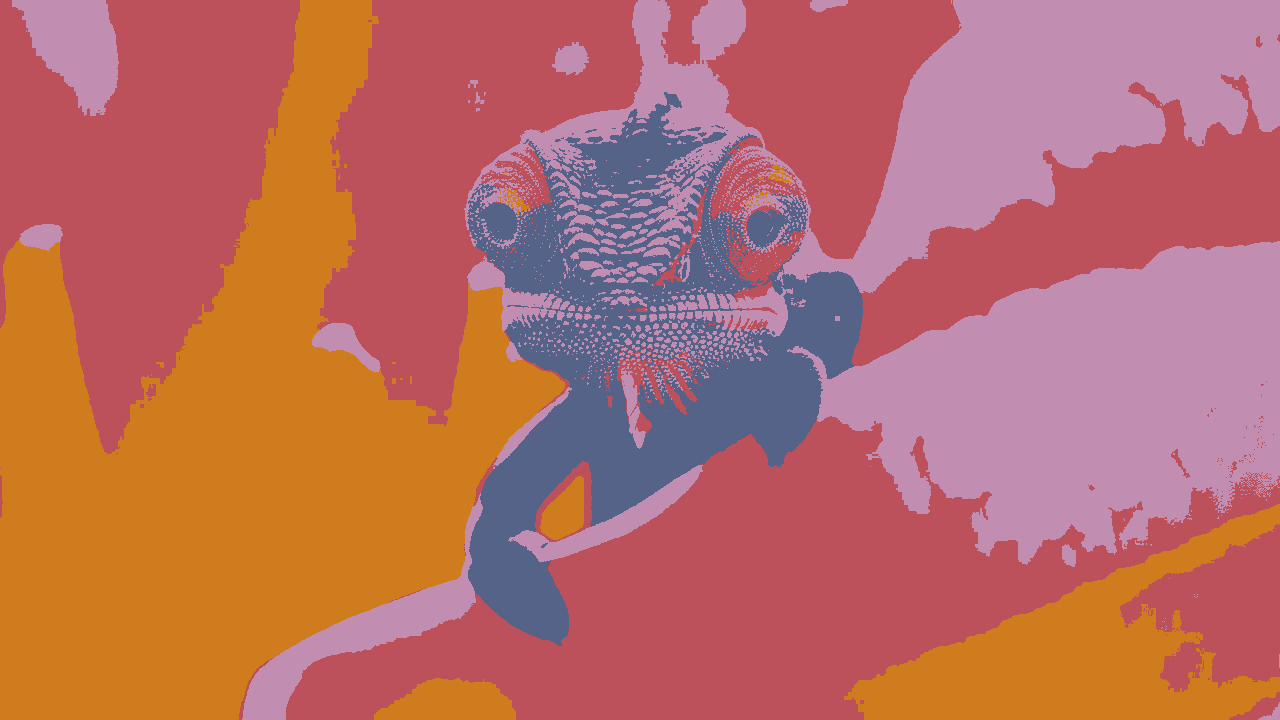

In [131]:
compressed_img_pil